https://www.kaggle.com/karthikbhandary2/boat-sales -- вот датасет с яхтами.

1) Постройте модель зависимости цены яхты от ее параметров. 

2) Насколько модель точна? (в качестве метрики можно выбрать mean absolute error)

3) Какие факторы в какой степени влияют на цену?

P.S. Если вам покажется, что яхты это скучно, вы можете взять любой другой датасет с kaggle)

In [27]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
%matplotlib inline
import seaborn as sns
sns.set()
cars = pd.read_csv('Car_sales.csv')
cars.head(200)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [28]:
cars.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [28]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [29]:
cars['Length'] = cars['Length'].fillna(cars['Length'].median()) 

In [31]:
cars.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               157 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [32]:
cars = cars.dropna()

In [33]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Model                117 non-null    object 
 2   Sales_in_thousands   117 non-null    float64
 3   __year_resale_value  117 non-null    float64
 4   Vehicle_type         117 non-null    object 
 5   Price_in_thousands   117 non-null    float64
 6   Engine_size          117 non-null    float64
 7   Horsepower           117 non-null    float64
 8   Wheelbase            117 non-null    float64
 9   Width                117 non-null    float64
 10  Length               117 non-null    float64
 11  Curb_weight          117 non-null    float64
 12  Fuel_capacity        117 non-null    float64
 13  Fuel_efficiency      117 non-null    float64
 14  Latest_Launch        117 non-null    object 
 15  Power_perf_factor    117 non-null    flo

теперь разделим нашу выборку, изменим качественные переменные, сделаем модели предсказания

In [29]:
X = cars[['Vehicle_type', 'Engine_size', 'Horsepower', 'Fuel_efficiency']]
y = cars['Price_in_thousands']

In [30]:
X = pd.get_dummies(X)

In [31]:
X.head()

,Engine_size,Horsepower,Fuel_efficiency,Vehicle_type_Car,Vehicle_type_Passenger
0,1.8,140.0,28.0,0,1
1,3.2,225.0,25.0,0,1
2,3.2,225.0,26.0,0,1
3,3.5,210.0,22.0,0,1
4,1.8,150.0,27.0,0,1


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
X_train.shape #обучающая выборка

(117, 5)

In [34]:
X_test.shape # тестовая выборка

(40, 5)

In [43]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [44]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [45]:
prediction = lg.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [46]:
X_test['prediction'] = prediction

NameError: name 'prediction' is not defined

In [48]:
X_test.head()

,Engine_size,Horsepower,Fuel_efficiency,Vehicle_type_Car,Vehicle_type_Passenger
18,5.7,255.0,15.0,1,0
107,3.3,170.0,18.0,1,0
141,3.0,194.0,22.0,1,0
68,4.0,190.0,20.0,1,0
48,2.5,170.0,25.0,0,1


In [49]:
X_test['prediction'] = prediction
X_test['target'] = y_test

NameError: name 'prediction' is not defined

In [50]:
X_test.corr()

,Engine_size,Horsepower,Fuel_efficiency,Vehicle_type_Car,Vehicle_type_Passenger
Engine_size,1.000000,0.934285,-0.798057,0.278956,-0.278956
Horsepower,0.934285,1.000000,-0.717329,0.130071,-0.130071
Fuel_efficiency,-0.798057,-0.717329,1.000000,-0.601931,0.601931
Vehicle_type_Car,0.278956,0.130071,-0.601931,1.000000,-1.000000
Vehicle_type_Passenger,-0.278956,-0.130071,0.601931,-1.000000,1.000000


<AxesSubplot:>

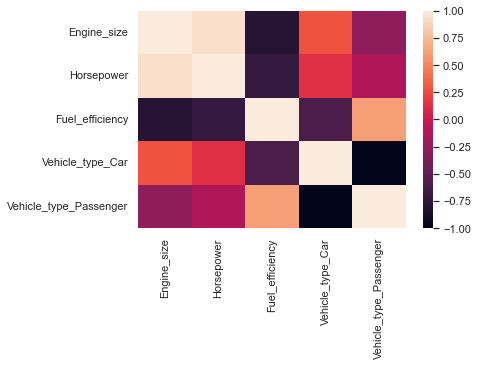

In [51]:
sns.heatmap(X_test.corr())